In [18]:
from bigraph_viz import plot_bigraph
from bigraph_viz.dict_utils import replace_regex_recursive

plot_settings = {'size':'8,5', 'show_types': True, 
                 # 'out_dir': 'out', 'dpi': '250', 'file_format': 'png'
                }

node ('GI tract', 'Duodenum', 'Epithelium') not in graph
node ('GI tract', 'Duodenum', 'Microbiota') not in graph
node ('GI tract', 'Duodenum', 'Mucosa') not in graph


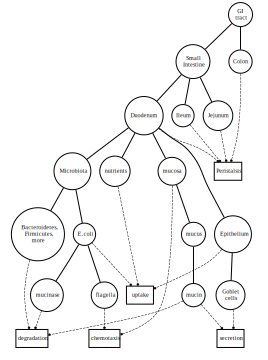

In [19]:
# schema
schema = {
    'GI tract': {
        'Small Intestine': {
            'Duodenum': {
                'nutrients': {},
                'mucosa': {'mucus': {'mucin': 'Any'}},
                'Epithelium': {
                    'Goblet cells': {
                        'secretion': {
                            '_ports': {'secreted': '', 'mucins': ''},
                            'wires': {
                                'secreted': ['..', '..', 'mucosa', 'mucus', 'mucin'],
                                'mucins': ['..', 'Goblet cells',],
                            }
                        }
                    },
                },
                'Microbiota': {
                    'E.coli': {
                        'mucinase': {},
                        'flagella': {},
                         'chemotaxis': {
                            '_ports': {
                                'mucus': 'Any',
                                'flagella': 'Any'
                            },
                            'wires': {
                                'mucus': ['..', '..', 'mucosa'],
                                'flagella': ['flagella'],
                            }
                         }
                    },
                    'Bacteroidetes, Firmicutes, more': {},
                    # 'Firmicutes': {},
                }, 
                'uptake': {
                    '_ports': {
                        '1': '', '2': '', '3': '', 
                    },
                    'wires': {
                        '1': ['nutrients'],
                        '2': ['Microbiota', 'E.coli'],
                        '3': ['Epithelium'],
                    }
                },
                'degradation': {
                    '_ports': {
                        '1': '', '2': '', '3': '', 
                    },
                    'wires': {
                        '1': ['mucosa', 'mucus', 'mucin'],
                        '2': ['Microbiota', 'E.coli', 'mucinase'],
                        '3': ['Microbiota', 'Bacteroidetes, Firmicutes, more'],
                    }
                },
            },
            'Jejunum': {},
            'Ileum': {},
        },
        'Colon': {},
        'Peristalsis': {
            '_ports': {
                '1': '', '2': '', '3': '', 
                '4': '',
            },
            'wires': {
                '1': ['Small Intestine', 'Duodenum'],
                '2': ['Small Intestine', 'Jejunum'],
                '3': ['Small Intestine', 'Ileum'],
                '4': ['Colon'],
            }
         },
    },
}

schema = replace_regex_recursive(schema)
# plot
plot_settings2 = {
    'node_groups':[
        [
            ('GI tract', 'Duodenum', 'Epithelium'), 
            ('GI tract', 'Duodenum', 'Microbiota'), 
            ('GI tract', 'Duodenum', 'Mucosa')
        ]
    ], 
    'remove_process_place_edges': True,
    'port_labels': False,
    **plot_settings}
plot_bigraph(schema, **plot_settings2, filename='gut_microbiome')

In [10]:
help(plot_bigraph)

Help on function plot_bigraph in module bigraph_viz.plot:

plot_bigraph(bigraph_schema, size='16,10', node_label_size='12pt', show_values=False, show_types=False, collapse_processes=False, port_labels=True, port_label_size='10pt', rankdir='TB', node_border_colors=None, node_fill_colors=None, node_groups=False, remove_nodes=None, invisible_edges=False, mark_top=False, remove_process_place_edges=False, print_source=False, dpi='70', file_format='png', out_dir=None, filename=None)
    Plot a bigraph from bigraph schema.
    
    Args:
        bigraph_schema (dict): The bigraph schema dict that will be plotted.
        size (str, optional): The size of the output figure (example: '16,10'). Default is '16,10'.
        node_label_size (str, optional): The font size for the node labels. Default is None.
        show_values (bool, optional): Display on value info in node label. Default is False.
        show_types (bool, optional): Display on type info in node label. Default is False.
        c